<a href="https://colab.research.google.com/github/sakuna47/Stock_Price_Prediction-/blob/Backend/Stock_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn yfinance imbalanced-learn matplotlib seaborn streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 433.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [32]:
# Download historical stock data
ticker = "AAPL"  # Example: Apple Inc.
data = yf.download(ticker, start="2010-01-01", end="2025-02-15")

# Explore the dataset
print(data.head())
print(data.info())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455077  6.391279  6.422877  493729600
2010-01-05  6.451468  6.487881  6.417462  6.458089  601904800
2010-01-06  6.348846  6.477045  6.342226  6.451466  552160000
2010-01-07  6.337108  6.379842  6.291065  6.372318  477131200
2010-01-08  6.379243  6.379846  6.291371  6.328686  447610800
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3804 entries, 2010-01-04 to 2025-02-14
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3804 non-null   float64
 1   (High, AAPL)    3804 non-null   float64
 2   (Low, AAPL)     3804 non-null   float64
 3   (Open, AAPL)    3804 non-null   float64
 4   (Volume, AAPL)  3804 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 178.3 KB
None


In [33]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
data = data.fillna(method="ffill")

# Feature engineering: Create target variable (e.g., next day's closing price)
data["Target"] = data["Close"].shift(-1)
data = data.dropna()

# Separate features and target
X = data.drop(["Target", "Close"], axis=1)
y = data["Target"]

# Detect and handle outliers using IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y = y[X.index]

# Handle imbalanced data using SMOTE
# smote = SMOTE()
# X_res, y_res = smote.fit_resample(X, y)
# Detect and handle outliers using IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y = y[X.index]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


<ipython-input-33-b50544ac94d0>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


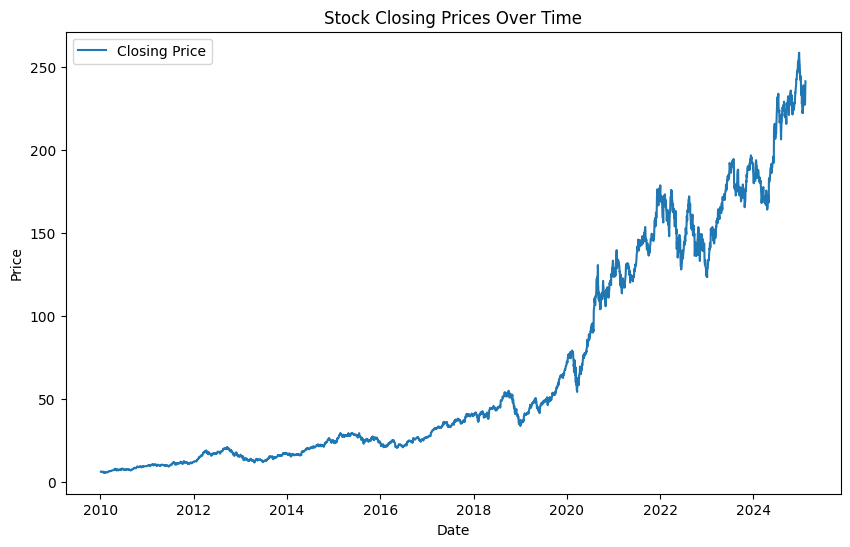

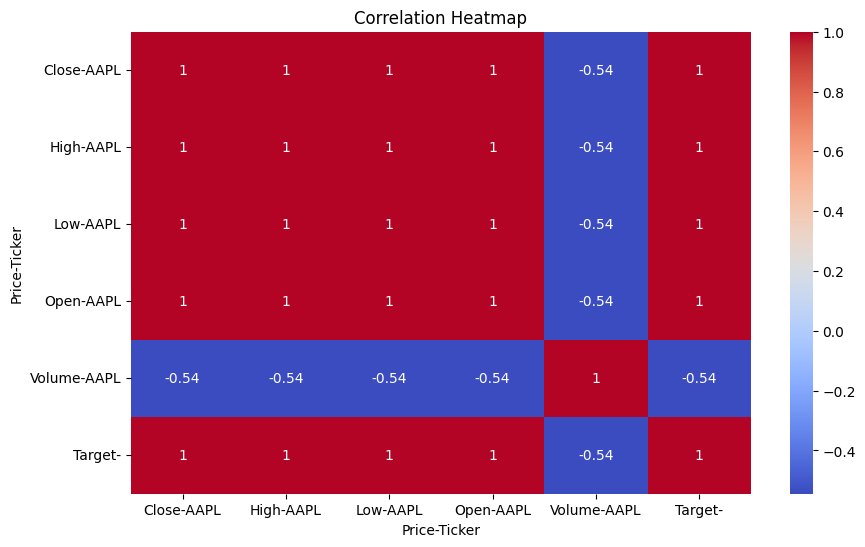

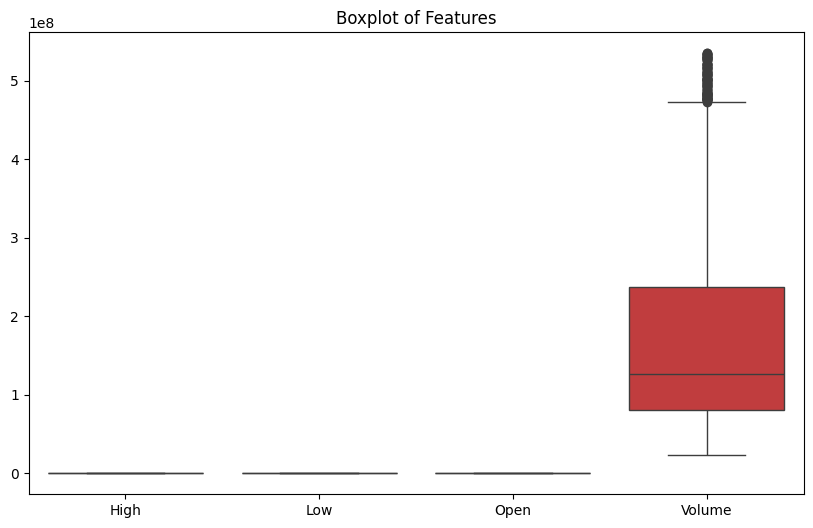

In [34]:
# Plot closing prices
plt.figure(figsize=(10, 6))
plt.plot(data["Close"], label="Closing Price")
plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title("Boxplot of Features")
plt.show()

In [35]:
# Initialize the Random Forest model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3.620850846430432
R2 Score: 0.9992017740011643


In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pickle

save_path = "/content/drive/My Drive/Stock Price Prediction /"

# Save the model
with open(save_path + "stock_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the scaler
with open(save_path + "scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
